In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import CategoricalEncoder


In [2]:
pip install category_encoders

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv(r"C:\Users\bakht\OneDrive\Desktop\loan_csv\loan_transformed.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,term_yrs,int_rate,grade,sub_grade,emp_length,home_ownership,...,desc,purpose,addr_state,dti,recoveries,last_pymnt_d,last_pymnt_amnt,application_type,dti_joint,tot_cur_bal
0,1077501,1296599,5000,5000,3,10.65,B,B2,10+,RENT,...,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.65,0.00,Jan-15,171.62,INDIVIDUAL,NaN,NaN
1,1077430,1314167,2500,2500,5,15.27,C,C4,1,RENT,...,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.00,117.08,Apr-13,119.66,INDIVIDUAL,NaN,NaN
2,1077175,1313524,2400,2400,3,15.96,C,C5,10+,RENT,...,none,small_business,IL,8.72,0.00,Jun-14,649.91,INDIVIDUAL,NaN,NaN
3,1076863,1277178,10000,10000,3,13.49,C,C1,10+,RENT,...,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.00,0.00,Jan-15,357.48,INDIVIDUAL,NaN,NaN
4,1075358,1311748,3000,3000,5,12.69,B,B5,1,RENT,...,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.94,0.00,Jan-16,67.79,INDIVIDUAL,NaN,NaN


In [5]:
df2= df[df["loan_status"] != 'Current']
df2["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

# Preprocessing

In [4]:
df2.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
term_yrs                 0
int_rate                 0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
issue_d                  0
loan_status              0
desc                     0
purpose                  0
addr_state               0
dti                      0
recoveries               0
last_pymnt_d           500
last_pymnt_amnt          0
application_type         0
dti_joint           244221
tot_cur_bal          61799
dtype: int64

In [6]:
X = df2.drop(["loan_status","desc","emp_length","issue_d","id","member_id","funded_amnt","term_yrs","dti"
             ,"dti_joint","tot_cur_bal","term_yrs","funded_amnt"], axis=1)

y = df2["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['grade',
 'sub_grade',
 'home_ownership',
 'purpose',
 'addr_state',
 'last_pymnt_d',
 'application_type']

In [7]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['loan_amnt', 'int_rate', 'annual_inc', 'recoveries', 'last_pymnt_amnt']

In [8]:
# encode categorical variables with one-hot encoding
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['grade','sub_grade','home_ownership','purpose','addr_state','last_pymnt_d',
                                 'application_type'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Random Forest Classification

In [9]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [11]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=0)


rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

D:\Users\bakht\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model accuracy score : 0.9489


In [12]:
y_pred_train = rfc.predict(X_train)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score : 0.9982


# Logestic Regression 

In [27]:
target_values = {'Fully Paid': 0 , 'Charged Off' : 1, 'Default' : 1}

target = df2["loan_status"]

target = target.map(target_values)

target.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [28]:
# encode categorical variables with one-hot encoding
import category_encoders as ce

X_Logestic = df2.drop(["loan_status","desc","emp_length","issue_d","id","member_id","funded_amnt","term_yrs","dti"
             ,"dti_joint","tot_cur_bal","term_yrs","funded_amnt"], axis=1)



X_train_Logestic, X_test_Logestic, Y_train_Logestic, Y_test_Logestic = train_test_split(X_Logestic, target, 
                                                                                        test_size = 0.3, random_state = 0)


In [29]:
encoder = ce.OneHotEncoder(cols=['grade','sub_grade','home_ownership','purpose','addr_state','last_pymnt_d',
                                 'application_type'])

X_train_Logestic = encoder.fit_transform(X_train_Logestic)

X_test_Logestic = encoder.transform(X_test_Logestic)

In [37]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score


model = LogisticRegression()
model.fit(X_train_Logestic, Y_train_Logestic)
Y_pred_Logestic = model.predict(X_test_Logestic)


print('Model accuracy score : {0:0.4f}'. format(accuracy_score(Y_test_Logestic, Y_pred_Logestic)))
print('Model precision score : {0:0.4f}'. format(precision_score(Y_test_Logestic, Y_pred_Logestic)))


D:\Users\bakht\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy score : 0.9094
Model precision score : 0.8542


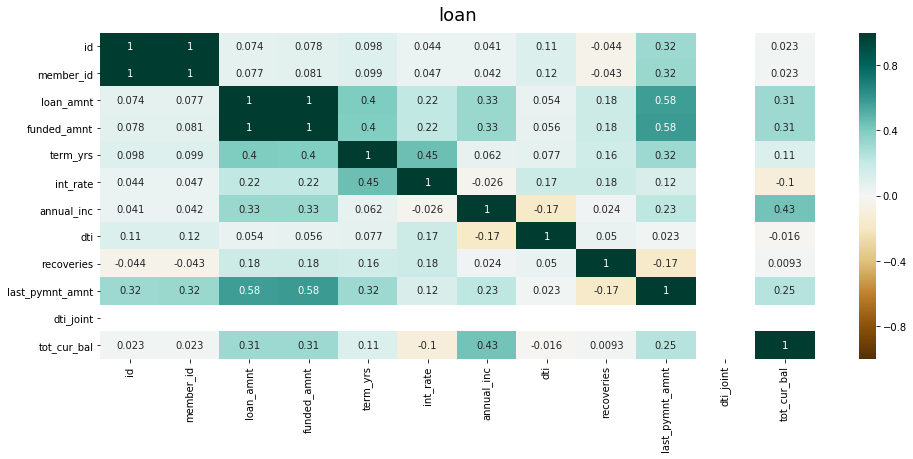

In [5]:
#import the library seaborn for having better heatmap and correlation
import seaborn as sns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('loan', fontdict={'fontsize':18}, pad=12);